## <center> ACM India and RBCDSAI Joint Summer School on DS/AI/ML
### <center> Hands-on Tutorial Day-6
### <center> Classification - LDA, QDA, SVM

**Contents:**  
1. Support Vector Machine  
1a. Linear SVM  
1b. Non - linear SVM    
1c. Analysis with Cancer dataset
2. Linear Discriminant Analysis -Wine dataset
3. Quadratic Discriminant Analysis

In [ ]:
# Load necessary packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split

## K-Nearest Neighbours classifcation

### Analyzing KNN Classification

In [ ]:
!pip install mglearn

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


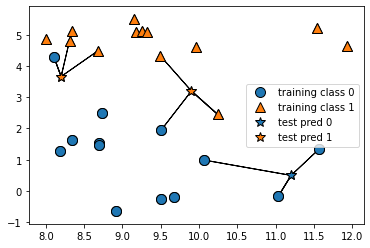

In [ ]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [ ]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Fit the model for sample data
clf.fit(X_train, y_train)

print("Test set predictions:", clf.predict(X_test))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## Support Vector Classifier

### How SVC works?

In [ ]:
!pip install mglearn

Text(0, 0.5, 'Feature 1')

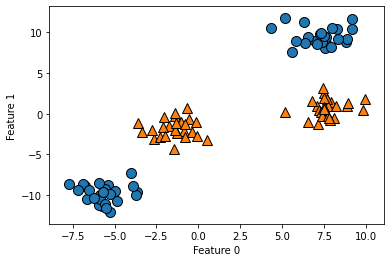

In [ ]:
import mglearn
# Generate dataset for understanding
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# Linear SVM for classification
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0, 0.5, 'Feature 1')

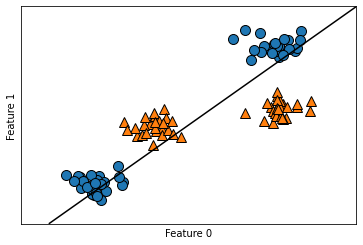

In [ ]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
#ax.scatter(X_new[:, 0], X_new[:, 1], X_new[:, 2], c='r', marker='^',
 #           cmap=mglearn.cm2, s=60, edgecolor='k')
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

In [ ]:
X_new

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Text(0.5, 0, 'feature1 ** 2')

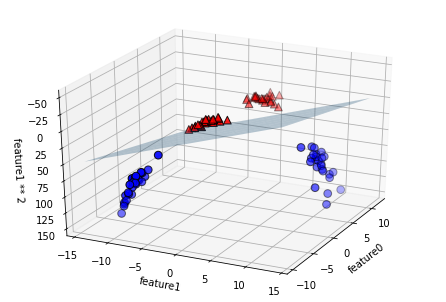

In [ ]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

#### Non-linear SVC


**Demonstration**

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X_d, y_d = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_svm = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, random_state=42))
poly_svm.fit(X_d, y_d)

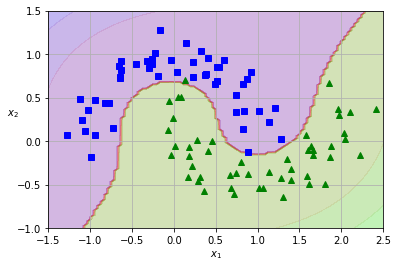

In [ ]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_d, y_d, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
from sklearn.svm import SVC
# Using polynomial kernel
poly_kernel_svm = make_pipeline(StandardScaler(),
                                SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm.fit(X_d, y_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

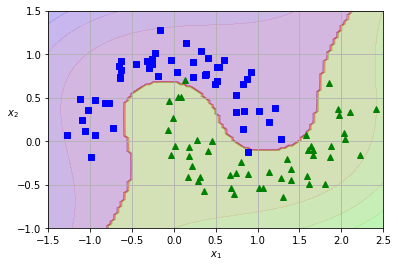

In [ ]:
plot_predictions(poly_kernel_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_d, y_d, [-1.5, 2.5, -1, 1.5])
plt.show()

**Gaussian-RBF**

In [ ]:
rbf_kernel_svm = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=10, C=0.001))   # C- Penalty parameter; gamma = Spread of the kernel)
rbf_kernel_svm .fit(X_d, y_d)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=10))])

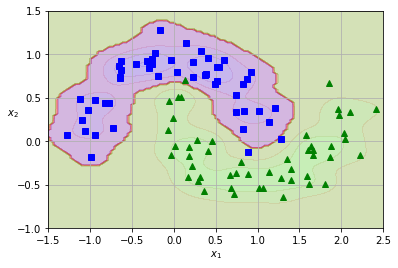

In [ ]:
plot_predictions(rbf_kernel_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_d, y_d, [-1.5, 2.5, -1, 1.5])
plt.show()

Gamma = 0 represents the linear SVC. Gamma represents the spread of the kernel. When the gamma is low, the curve of the decision boundary is low 

**Hyper-parameter tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distrib = {
    "svc__gamma": reciprocal(0.001, 0.1),
    "svc__C": uniform(1, 10)
}
rnd_search_cv = RandomizedSearchCV(rbf_kernel_svm, param_distrib, n_iter=100, cv=5,
                                   random_state=42)
rnd_search_cv.fit(X_d, y_d)
print(rnd_search_cv.best_estimator_)
tuned_param = rnd_search_cv.best_estimator_[1]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=4.745401188473625, gamma=0.07969454818643928))])


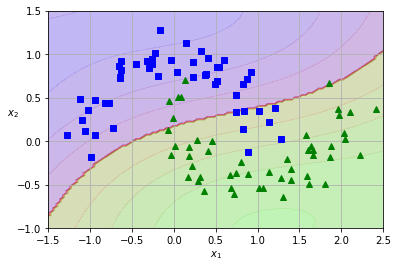

In [ ]:
rbf_kernel_svm1 = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=tuned_param.gamma, C=tuned_param.C))   # C- Penalty parameter; gamma = Spread of the kernel)
rbf_kernel_svm1.fit(X_d, y_d)
plot_predictions(rbf_kernel_svm1, [-1.5, 2.5, -1, 1.5])
plot_dataset(X_d, y_d, [-1.5, 2.5, -1, 1.5])
plt.show()

## Cancer Dataset

### Data preprocessing

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data

In [ ]:
data    #Look what does the data have

# Extracting X and y from the imported data
X = pd.DataFrame(data.data,columns = data.feature_names)
#X.head()

y = data.target
#y


In [ ]:
# Whether the data has any null values
X.info()

In [ ]:
# How does the features distribution looks like?
X.describe()

In [ ]:
# Remove multi-collinearity in the data
# Look at the collinearity in the data
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


As mean_perimeter, mean_area and mean_radius (worst_perimeter, worst_area and worst_radius), two of the three correlated data is removed

In [ ]:
# Modified X
X1 = X.drop(['mean perimeter','mean area','worst perimeter','worst area'],axis = 1)
print(X.shape)
print(X1.head())

All the features in this dataset is numerical and standard normalization (z-transformation) is applied on all the features

In [ ]:
from sklearn.preprocessing import StandardScaler
# z-transformation
scaler = sklearn.preprocessing.StandardScaler()
X1_z = scaler.fit_transform(X1)
print(pd.DataFrame(X1_z).head())

#from scipy.stats import zscore
#X1_z = X1.apply(zscore)
#print(pd.DataFrame(X1_z).head())

In [ ]:
pd.DataFrame(X1).describe()

### SVC for cancer dataset

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X1, y,
                                                    test_size = 0.3,
                                                    random_state=0)

In [ ]:
print(X1.shape)
print(X_train.shape)
print(X_test.shape)

(569, 26)
(398, 26)
(171, 26)


#### Linear SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC


# The model performance can be tuned by varying the hyperparameters C
lsvc = make_pipeline(StandardScaler(),
                       LinearSVC(C=100, random_state=42))
#lsvc = SVC(kernel = 'linear',C = 100)
lsvc.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=100, random_state=42))])

In [ ]:
# Prediction
y_pred_svc = lsvc.predict(X_test)
print("Accuracy on training set: {:.2f}".format(lsvc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(lsvc.score(X_test, y_test)))

Accuracy on training set: 0.99
Accuracy on test set: 0.94


In [ ]:
from sklearn import *
# Prediction on untransformed data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.3,random_state=0)
lsvc1 = SVC(kernel = 'linear',C = 100)
lsvc1.fit(X_train1, y_train1)
y_pred_svc1 = lsvc1.predict(X_test1)
print("Accuracy on training set: {:.2f}".format(lsvc1.score(X_train1, y_train1)))
print("Accuracy on test set: {:.2f}".format(lsvc1.score(X_test1, y_test1)))

**Non-linear SVC**

In [ ]:
# Polynomial of degree 2
poly_svc = make_pipeline(
    #PolynomialFeatures(degree=2),
    StandardScaler(),
    #LinearSVC(C=10, max_iter=10_000, random_state=42)
    SVC(kernel = 'poly',C=10, max_iter=10_000, random_state=42)
)
poly_svc.fit(X_train, y_train)
y_pred_svc_poly = poly_svc.predict(X_test)
print("Accuracy on training set: {:.2f}".format(poly_svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(poly_svc.score(X_test, y_test)))

Accuracy on training set: 0.97
Accuracy on test set: 0.98


#### Evaluation metrics


1. Confusion matrix
2. Precision-Recall score
3. ROC 

**Confusion matrix**

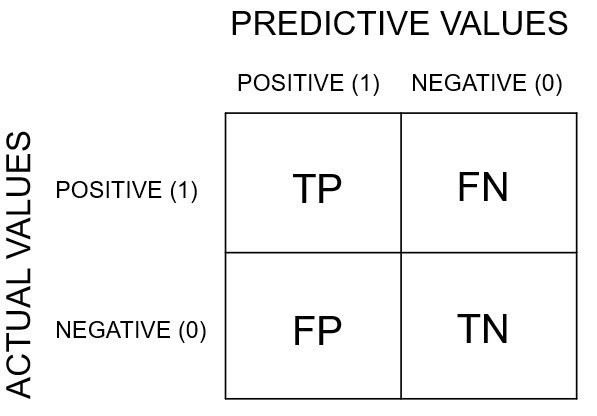




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 59   4]
 [  6 102]]


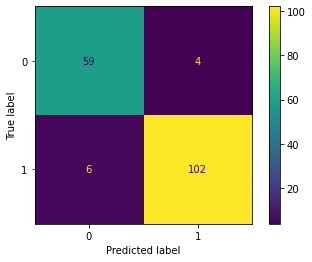

In [ ]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, lsvc.predict(X_test))
metrics.plot_confusion_matrix(lsvc,X_test,y_test)
print(cm)

**Precision and recall**

In [ ]:
from sklearn.metrics import precision_score, recall_score

#Precision score
# Computes the precision: TP / (FP + TP)
#print(cm[1, 1] / (cm[0, 1] + cm[1, 1]))
print(precision_score(y_test, lsvc.predict(X_test)))

#Recall score
#Computes the recall: TP / (FN + TP)
#print('Recall score: ' , cm[1, 1] / (cm[1, 0] + cm[1, 1]))
print(recall_score(y_test, lsvc.predict(X_test)))

0.9622641509433962
0.9444444444444444


In [ ]:
# F1 score
from sklearn.metrics import f1_score

#computes the f1 score
#print('F1 Score: ' ,cm[1, 1] / (cm[1, 1] + (cm[1, 0] + cm[0, 1]) / 2))
print(f1_score(y_test, lsvc.predict(X_test)))

0.9532710280373832


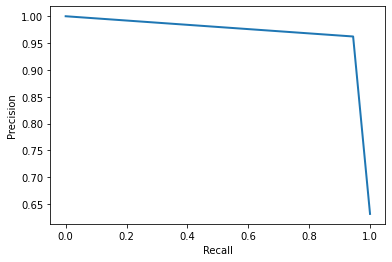

In [ ]:
# Precision-Recall curve
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, 
                                                         lsvc.predict(X_test))

plt.plot(recalls, precisions, linewidth=2, label="Precision/Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [ ]:
lsvc_metrics = metrics.classification_report(y_test, lsvc.predict(X_test))
print(lsvc_metrics)

**ROC**

In [ ]:
# ROC curve
from sklearn.metrics import roc_auc_score

roc_lsvc = roc_auc_score(y_test, lsvc.predict(X_test))

Text(0, 0.5, 'True Positive Rate')

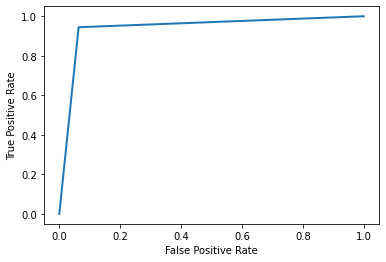

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, lsvc.predict(X_test))

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

### Dataset 2

Load the given dataset and report the accuracy of the classification using Linear SVC, Polynomial and kernel SVC. Suggest the appropriate model for the classification 

In [ ]:
data2 = pd.read_csv('https://tinyurl.com/polynomialData16072022')


## Linear Discriminatory Analysis (LDA) 

In [ ]:
data = pd.read_csv('https://tinyurl.com/Smarket16072022')
data.head()
data.describe()

,Unnamed: 0,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,625.500000,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,360.988227,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,1.000000,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,313.250000,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,625.500000,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,937.750000,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,1250.000000,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [ ]:
#data = data.drop(['Unnamed: 0'],axis = 1)

X = data.drop(["Direction","Unnamed: 0","Year"], axis = 1)
#X = data.drop(["Year"],axis = 1)
y = data["Direction"]

In [ ]:
# Data splitting 
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,random_state=0)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
# Fitting model to the dataset
lda = LinearDiscriminantAnalysis()
lda = lda.fit(X_train, y_train)

# Prior probabilities [Informs the probability of the class 0/1 in training observations]
print(lda.priors_)

[0.47771429 0.52228571]


In [ ]:
#Mean of each predictor within each class
print(lda.means_)

In [ ]:
#Linear composition to form the decision boundary
print(lda.coef_)

In [ ]:
# Prediction on the test datsset
y_pred=lda.predict(X_test)
print(np.unique(y_pred, return_counts=True))

(array(['Down', 'Up'], dtype='<U4'), array([173, 202]))


In [ ]:
# Evaluation metrics
print(metrics.confusion_matrix(y_pred, y_test))
print(metrics.classification_report(y_test, y_pred, digits=3))

[[173   0]
 [ 11 191]]
              precision    recall  f1-score   support

        Down      1.000     0.940     0.969       184
          Up      0.946     1.000     0.972       191

    accuracy                          0.971       375
   macro avg      0.973     0.970     0.971       375
weighted avg      0.972     0.971     0.971       375



## Quadratic Discriminatory Analysis(QDA)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda = qda.fit(X_train, y_train)
print(qda.priors_)
print(qda.means_)

[0.47771429 0.52228571]
[[ 1.76531100e-02  1.85215311e-02 -2.75406699e-02  3.60334928e-02
  -8.68421053e-04  1.47064675e+00 -8.56126794e-01]
 [-6.62975930e-02 -6.05361050e-02  3.06564551e-02 -1.80962801e-02
  -4.63391685e-02  1.48403133e+00  8.09700219e-01]]


QDA does not have coefficients because it follows quadratic form rather than linear combination for prediction

In [ ]:
y_pred_qda=qda.predict(X_test)
print(np.unique(y_pred_qda, return_counts=True))
print(metrics.confusion_matrix(y_pred_qda, y_test))
print(metrics.classification_report(y_test, y_pred_qda, digits=3))

(array(['Down', 'Up'], dtype=object), array([175, 200]))
[[168   7]
 [ 16 184]]
              precision    recall  f1-score   support

        Down      0.960     0.913     0.936       184
          Up      0.920     0.963     0.941       191

    accuracy                          0.939       375
   macro avg      0.940     0.938     0.939       375
weighted avg      0.940     0.939     0.939       375



**Question**   
Predict the caravan purchase using the given dataset : https://tinyurl.com/caravanData16072022   

In [ ]:
test = pd.read_csv('https://tinyurl.com/pokemonData16072022')

**Sources:**  
1. [Stat 508 - Applied data mining and statistical learning](https://online.stat.psu.edu/stat508/lesson/9/9.2/9.2.6)  
2. http://www.science.smith.edu/~jcrouser/SDS293/labs/lab5-py.html - for LDA and QDA  
3. [Hands-on machine learning with Scikit-Learn by A.Geron](https://github.com/ageron/handson-ml3)  

